# Election chatbot

This is a data science notebook for collecting and analysing political debates, developed by Campax for the 2023 election year in Switzerland. Based on this we would like to create a chatbot, accessible via different popular messaging.

More details are in [this document](https://docs.google.com/document/d/1D9482ILL8ORyMTCPjMOUsm-EaG9Xid85EfRNO1uulJc/edit#).

In [23]:
import re
import pandas as pd
from pandas import Series, DataFrame

We are using the [parliament-viz](https://github.com/jmuth/parliament-viz.ch) library by Gael Lederrey, Jonas Racine and Joachim Muth to collect fresh data from the parliamentary service. Get it in our [GitHub project](https://github.com/Campax-org/election-chatbot/tree/main/data), and upload it into the colab session to get started.

In [7]:
Party = pd.read_csv('Party.csv')
Person = pd.read_csv('Person.csv')
MemberCouncil = pd.read_csv('MemberCouncil.csv')
Transcript = pd.read_csv('transcript_1000.csv')

Let's explore the data a little.

In [9]:
Party.head()

,Unnamed: 0,ID,Language,PartyNumber,PartyName,StartDate,EndDate,Modified,PartyAbbreviation
0,0,12,FR,12,Parti socialiste suisse,1888-01-01T00:00:00,NaN,2010-12-26T13:05:26.43,PSS
1,1,13,FR,13,Union Démocratique du Centre,1848-01-01T00:00:00,NaN,2010-12-26T13:05:26.43,UDC
2,2,14,FR,14,Parti démocrate-chrétien suisse,1848-01-01T00:00:00,NaN,2010-12-26T13:05:26.43,PDC
3,3,15,FR,15,PLR.Les Libéraux-Radicaux,1848-01-01T00:00:00,NaN,2010-12-26T13:05:26.43,PLR
4,4,16,FR,16,Parti libéral démocrate,1848-01-01T00:00:00,NaN,2010-12-26T13:05:26.43,PLD


In [10]:
Person.head()

,Unnamed: 0,ID,Language,PersonNumber,PersonIdCode,Title,TitleText,LastName,GenderAsString,DateOfBirth,...,MaritalStatusText,PlaceOfBirthCity,PlaceOfBirthCanton,Modified,FirstName,OfficialName,MilitaryRank,MilitaryRankText,NativeLanguage,NumberOfChildren
0,0,1,FR,1,2200.0,NaN,NaN,Aguet,m,1938-03-02T00:00:00,...,NaN,Pompaples,Vaud,2018-10-05T13:20:48.477,Pierre,Aguet,5.0,Fourrier,F,NaN
1,1,2,FR,2,2002.0,NaN,NaN,Allenspach,m,1928-02-22T00:00:00,...,NaN,NaN,NaN,2022-09-23T14:20:47.21,Heinz,Allenspach,NaN,NaN,D,NaN
2,2,6,FR,6,2004.0,9.0,dipl. Bauing. HTL,Aregger,m,1931-01-27T00:00:00,...,NaN,Hasle,Lucerne,2018-10-05T13:22:33.513,Manfred,Aregger,7.0,Adjudant sous-officier,D,NaN
3,3,7,FR,7,2005.0,NaN,NaN,Aubry,f,1928-03-04T00:00:00,...,NaN,NaN,NaN,2015-05-17T21:18:19.387,Geneviève,Aubry Geneviève,NaN,NaN,F,NaN
4,4,8,FR,8,2008.0,NaN,NaN,Bär,f,1947-12-01T00:00:00,...,NaN,NaN,NaN,2015-05-17T21:18:19.387,Rosmarie,Bär,NaN,NaN,D,NaN


In [11]:
MemberCouncil.head()

,Unnamed: 0,ID,Language,IdPredecessor,PersonNumber,PersonIdCode,Active,FirstName,LastName,GenderAsString,...,DateJoining,DateLeaving,DateElection,DateOath,DateResignation,Modified,NumberOfChildren,Citizenship,DateOfBirth,DateOfDeath
0,0,1,FR,NaN,1,2200.0,False,Pierre,Aguet,m,...,1995-12-04T00:00:00,1999-12-05T00:00:00,1995-12-04T00:00:00,1995-12-04T00:00:00,1999-12-05T00:00:00,2018-10-05T13:20:48.477,NaN,"Sullens (VD),Lutry (VD)",1938-03-02T00:00:00,NaN
1,1,2,FR,NaN,2,2002.0,False,Heinz,Allenspach,m,...,1979-11-26T00:00:00,1995-12-03T00:00:00,1979-11-26T00:00:00,1979-11-26T00:00:00,1995-12-03T00:00:00,2022-09-23T14:20:47.21,NaN,"Kreuzlingen (TG),Fällanden (ZH)",1928-02-22T00:00:00,2022-09-16T00:00:00
2,2,6,FR,NaN,6,2004.0,False,Manfred,Aregger,m,...,1995-12-04T00:00:00,1999-12-05T00:00:00,1995-12-04T00:00:00,1995-12-04T00:00:00,1999-12-05T00:00:00,2018-10-05T13:22:33.513,NaN,Hasle (LU),1931-01-27T00:00:00,NaN
3,3,7,FR,NaN,7,2005.0,False,Geneviève,Aubry,f,...,1979-11-26T00:00:00,1995-12-03T00:00:00,1979-11-26T00:00:00,1979-11-26T00:00:00,1995-12-03T00:00:00,2015-05-17T21:18:19.387,NaN,Tavannes (BE),1928-03-04T00:00:00,NaN
4,4,8,FR,NaN,8,2008.0,False,Rosmarie,Bär,f,...,1987-11-30T00:00:00,1995-12-03T00:00:00,1987-11-30T00:00:00,1987-11-30T00:00:00,1995-12-03T00:00:00,2015-05-17T21:18:19.387,NaN,"Siselen (BE),Richterswil (ZH)",1947-12-01T00:00:00,NaN


In [16]:
Transcript.tail(1)

,Unnamed: 0,ID,Language,IdSubject,VoteId,PersonNumber,Type,Text,MeetingCouncilAbbreviation,MeetingDate,...,End,Function,DisplaySpeaker,LanguageOfText,Modified,StartTimeWithTimezone,EndTimeWithTimezone,VoteBusinessNumber,VoteBusinessShortNumber,VoteBusinessTitle
84,84,90,FR,10,36.0,NaN,2,<pd_text><p><i>Gesamtabstimmung - Vote sur l'e...,N,19991207,...,NaN,NaN,NaN,DE,2017-11-16T16:47:14.247,NaN,NaN,19990050.0,99.05,Suisse Tourisme.\nAide financière 2000-2004


In [38]:
t = Transcript.tail(1).get('Text').values[0]
re.sub(re.compile('<.*?>|\[[A-Z]*\]'), '', t.replace('\n', ' '))

"Gesamtabstimmung - Vote sur l'ensemble  Für Annahme des Entwurfes .... 142 Stimmen Dagegen .... 3 Stimmen  An den Bundesrat - Au Conseil fédéral   "

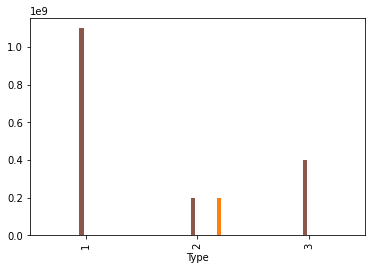

In [44]:
Transcript.groupby('Type').sum().plot(kind='bar', legend=False)